In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
import tensorflow as tf


In [42]:
from keras.datasets import mnist

In [43]:
((x_train, y_train), (x_test, y_test))= mnist.load_data()

In [44]:
only_zeros = x_train[y_train == 7]

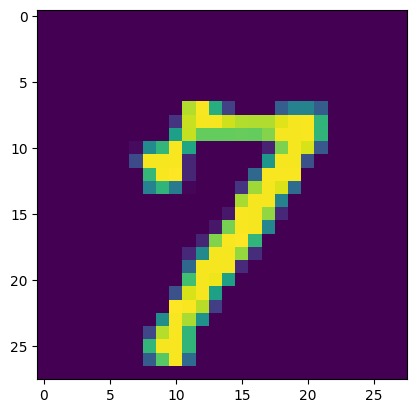

In [45]:
plt.imshow(only_zeros[30]);

In [46]:
x_train.shape, only_zeros.shape

((60000, 28, 28), (6265, 28, 28))

In [47]:


generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=784, activation='sigmoid'),
    tf.keras.layers.Reshape((28, 28))
 ])


In [48]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
 ])

In [49]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
GAN = tf.keras.models.Sequential([generator, discriminator])

In [51]:
discriminator.trainable = False

In [52]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
GAN.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
GAN.layers

[<Sequential name=sequential_5, built=False>,
 <Sequential name=sequential_6, built=False>]

In [55]:
GAN.layers[0].summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
batch_size = 32

In [57]:
tf.data.Dataset.from_tensor_slices(only_zeros)

<_TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>

In [58]:
dataset = tf.data.Dataset.from_tensor_slices(only_zeros).shuffle(buffer_size=1000)

In [59]:
dataset, type(dataset)

(<_ShuffleDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>,
 tensorflow.python.data.ops.shuffle_op._ShuffleDataset)

In [60]:
new_dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)


In [61]:
generator, discriminator

(<Sequential name=sequential_5, built=False>,
 <Sequential name=sequential_6, built=False>)

In [62]:
EPOCHS = 20

for epoch in range(EPOCHS):
    print(f"Suntem in epoca {epoch + 1}")

    for x_batch in new_dataset:
        noise = tf.random.normal(shape=(batch_size, 100))
        gen_images = generator(noise) # fake images


        x_fake_and_real = tf.concat([gen_images, tf.dtypes.cast(x_batch, tf.float32)], axis=0)
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)


        discriminator.trainable = True
        discriminator.train_on_batch(x_fake_and_real, y1)

        discriminator.trainable = False

        noise = tf.random.normal(shape=(batch_size, 100))
        y2 = tf.constant([[1.]] * batch_size)



        GAN.train_on_batch(noise, y2)





Suntem in epoca 1
Suntem in epoca 2
Suntem in epoca 3
Suntem in epoca 4
Suntem in epoca 5
Suntem in epoca 6
Suntem in epoca 7
Suntem in epoca 8
Suntem in epoca 9
Suntem in epoca 10
Suntem in epoca 11
Suntem in epoca 12
Suntem in epoca 13
Suntem in epoca 14
Suntem in epoca 15
Suntem in epoca 16
Suntem in epoca 17
Suntem in epoca 18
Suntem in epoca 19
Suntem in epoca 20


In [63]:
noise = tf.random.normal(shape=(10, 100))

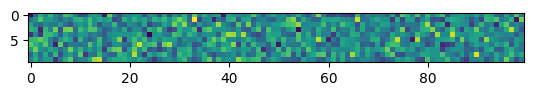

In [64]:
plt.imshow(noise)

In [65]:
images =  generator(noise)

In [66]:
single_image = images[0]

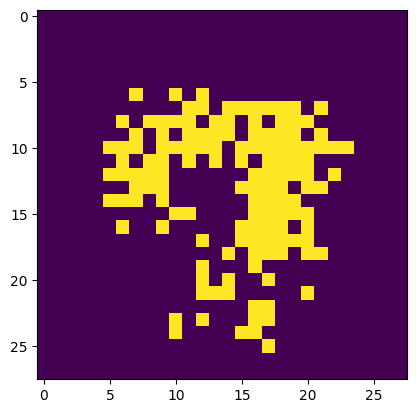

In [67]:
plt.imshow(single_image)

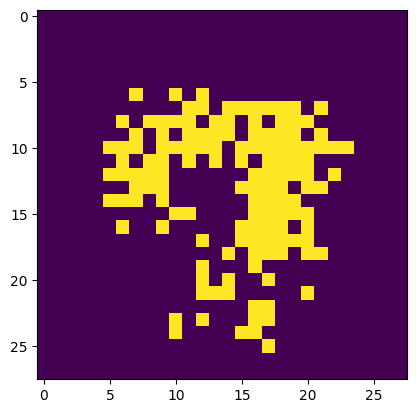

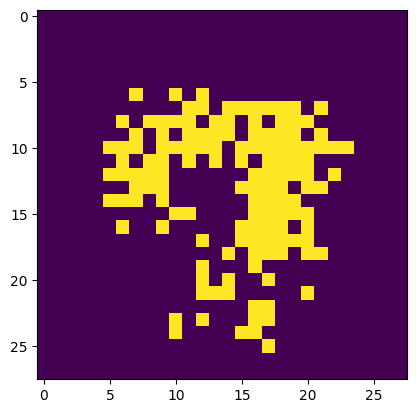

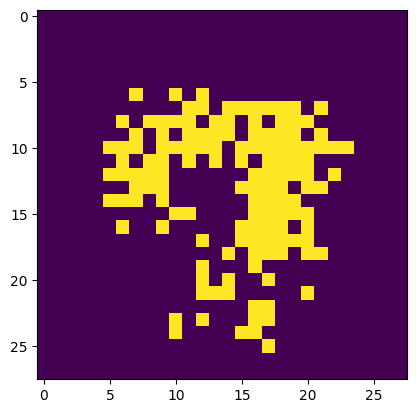

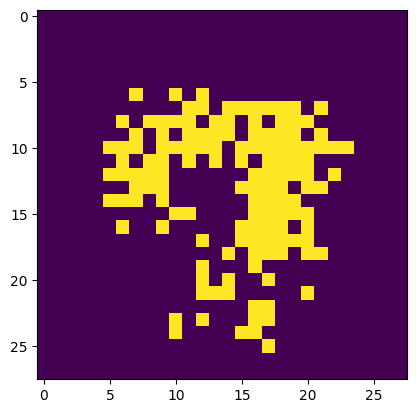

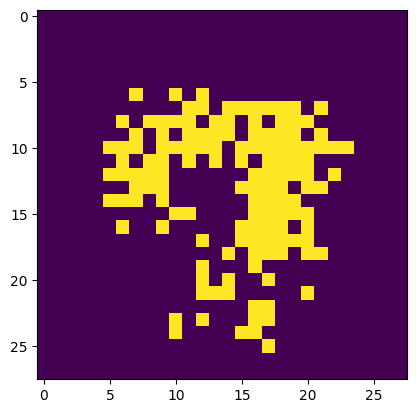

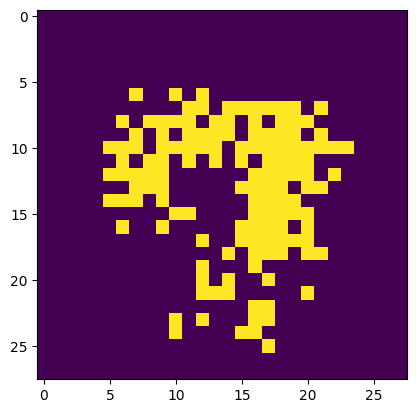

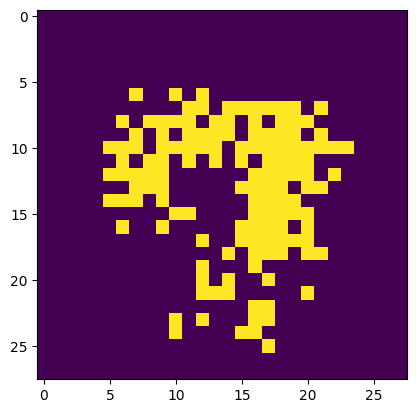

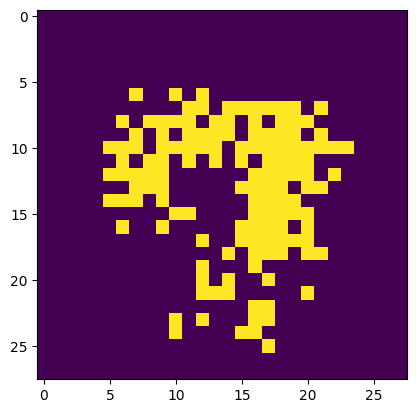

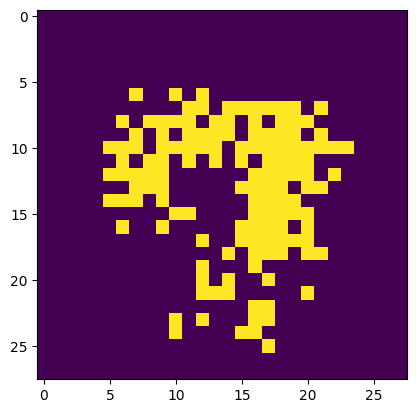

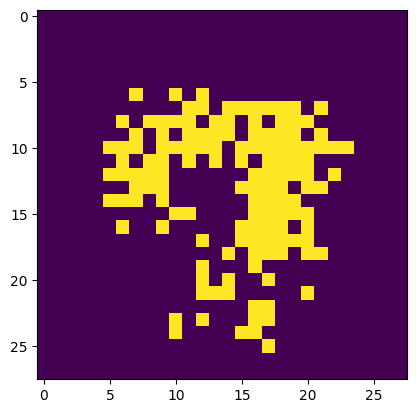

In [68]:
for im in images:
    plt.imshow(im)
    plt.show()